In [117]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [118]:
pingvin = pd.read_csv('pingvin.csv')
pingvin.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Klaszterező módszerek az adatot csoportokra osztják. Pl. k közép algoritmus.

In [119]:
pingvin.drop(columns=['year'], inplace=True)
pingvin.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,male
1,Torgersen,39.5,17.4,186.0,3800.0,female
2,Torgersen,40.3,18.0,195.0,3250.0,female
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,female


In [120]:
pingvin.isnull().sum()

island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [121]:
pingvin.dropna(inplace=True)
pingvin.isnull().sum()

island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [122]:
pingvin.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


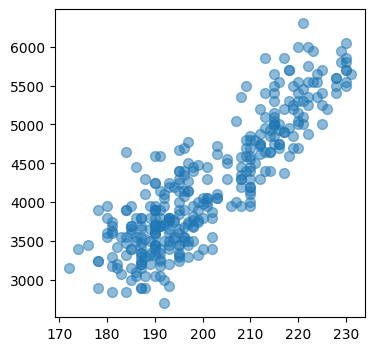

In [123]:
plt.figure(figsize=(4, 4))
plt.scatter(x=pingvin['flipper_length_mm'], y=pingvin['body_mass_g'], s=50, alpha=0.5)

Egy egyszerű lineáris korreláció figyelhető meg. Ilyenkor érdemes lehet megfontolni, hogy az egyiket kihagyjuk a klaszterezésből. Mi ebben az esetben meghagyjuk.

Látszik az is az ábrából mintha már alapból két csoport lenne.

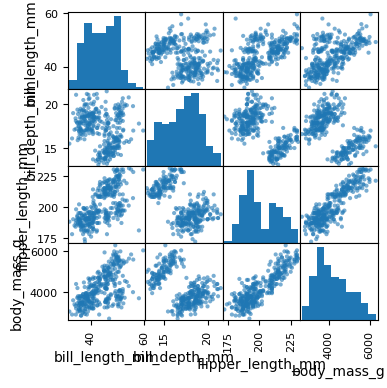

In [124]:
_ = pd.plotting.scatter_matrix(pingvin, alpha=0.6, figsize=(4,4));

Két csúcsú oszlopdiagram általában jele az elkülönülésnek.

Még a klaszterezést át kell írni numerikus értékre.

In [125]:
from sklearn import preprocessing

enc = preprocessing.OrdinalEncoder()
encoded = enc.fit_transform(pingvin[['island']])
encoded2 = enc.fit_transform(pingvin[['sex']])


encoded[:10]

array([[2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [126]:
pingvin.drop(columns=['island', 'sex']);

In [127]:
pingvin['island'] = encoded
pingvin['sex'] = encoded2

In [128]:
pingvin.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2.0,39.1,18.7,181.0,3750.0,1.0
1,2.0,39.5,17.4,186.0,3800.0,0.0
2,2.0,40.3,18.0,195.0,3250.0,0.0
4,2.0,36.7,19.3,193.0,3450.0,0.0
5,2.0,39.3,20.6,190.0,3650.0,1.0


Ez az adathalmaz még mindig nem az igazi nagyon eltérő intervallumból vannak a különböző értékek számai. Ez azért probléma mert a k közép algoritmus euklideszi távolságot használ.

Ezért normalizálnunk kell az adatokat.

In [129]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pingvin_sc = scaler.fit_transform(pingvin.values)

pingvin_sc

array([[ 1.88939197, -0.89604189,  0.7807321 , -1.42675157, -0.56847478,
         0.99103121],
       [ 1.88939197, -0.82278787,  0.11958397, -1.06947358, -0.50628618,
        -1.00904996],
       [ 1.88939197, -0.67627982,  0.42472926, -0.42637319, -1.1903608 ,
        -1.00904996],
       ...,
       [ 0.48812799,  1.02687621,  0.52644436, -0.56928439, -0.53738048,
         0.99103121],
       [ 0.48812799,  1.24663828,  0.93330475,  0.64546078, -0.13315457,
         0.99103121],
       [ 0.48812799,  1.13675725,  0.7807321 , -0.2120064 , -0.53738048,
        -1.00904996]])

Most már készen áll minden próbáljunk először két klasztert alkotni:

Véletlenszerű pontlerakást használva 200 iteráción keresztül.

In [130]:
from sklearn.cluster import KMeans

cl = KMeans(n_clusters=2, init='random', n_init=10, max_iter=200)

cl.fit(pingvin_sc)
clusters= cl.predict(pingvin_sc)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

array([[<Axes: xlabel='island', ylabel='island'>,
        <Axes: xlabel='bill_length_mm', ylabel='island'>,
        <Axes: xlabel='bill_depth_mm', ylabel='island'>,
        <Axes: xlabel='flipper_length_mm', ylabel='island'>,
        <Axes: xlabel='body_mass_g', ylabel='island'>,
        <Axes: xlabel='sex', ylabel='island'>],
       [<Axes: xlabel='island', ylabel='bill_length_mm'>,
        <Axes: xlabel='bill_length_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='bill_length_mm'>,
        <Axes: xlabel='sex', ylabel='bill_length_mm'>],
       [<Axes: xlabel='island', ylabel='bill_depth_mm'>,
        <Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='body_mass_g', yla

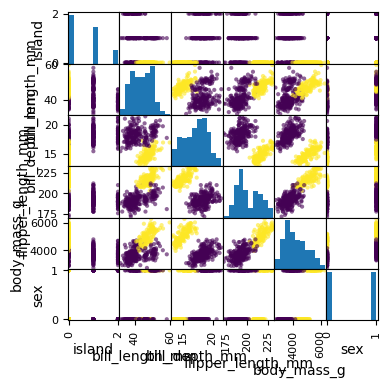

In [131]:
pd.plotting.scatter_matrix(pingvin, alpha=0.6, figsize=(4,4), c=clusters)

array([[<Axes: xlabel='island', ylabel='island'>,
        <Axes: xlabel='bill_length_mm', ylabel='island'>,
        <Axes: xlabel='bill_depth_mm', ylabel='island'>,
        <Axes: xlabel='flipper_length_mm', ylabel='island'>,
        <Axes: xlabel='body_mass_g', ylabel='island'>,
        <Axes: xlabel='sex', ylabel='island'>],
       [<Axes: xlabel='island', ylabel='bill_length_mm'>,
        <Axes: xlabel='bill_length_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='bill_length_mm'>,
        <Axes: xlabel='sex', ylabel='bill_length_mm'>],
       [<Axes: xlabel='island', ylabel='bill_depth_mm'>,
        <Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='body_mass_g', yla

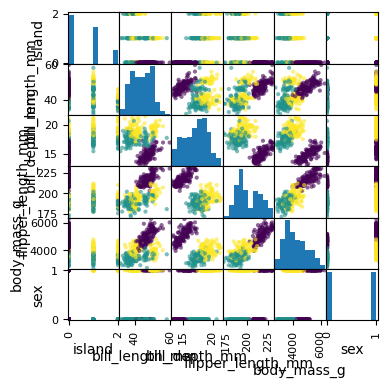

In [132]:
cl2 = KMeans(n_clusters=3, init='random', n_init=10, max_iter=200)

cl2.fit(pingvin_sc)
clusters2 = cl2.predict(pingvin_sc)
pd.plotting.scatter_matrix(pingvin, alpha=0.6, figsize=(4,4), c=clusters2)

Inercia: a pontok saját klaszeterük közepétől vett távolságának átlaga

In [133]:
cl.inertia_

1064.2220432904867

In [134]:
cl2.inertia_

757.4188813119459

Inceria több klaszer készítésével csökkenthető (értelmes tartományon belül, mert 1 pontos klasztereket nem akarunk). Célunk azt a maximális klaszterszámot megtalálni, ahol az inercia minimális.

Sziluett: a pontok saját klaszeterük közepétől és más klaszterek közepétől vett távolsága. Sziluett pont a sziluettek klaszterenkénti átlagának átlaga.

In [135]:
from sklearn.metrics import silhouette_score



In [136]:
silhouette_score(pingvin_sc, labels=clusters)

0.4363258747905643

In [137]:
silhouette_score(pingvin_sc, labels=clusters2)

0.41101177887053675

Főkomponens analízis: dimenziócsökkentő módszer

A legnagyobb szórású dimenziókat tartja meg, ez értelemszerűen adatvesztéssel jár.

In [138]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
stats = pca.fit_transform(pingvin_sc)

# a főkomponsek arányai (általában nem 1 az összege)
pca.explained_variance_ratio_

array([0.54381231, 0.24974664])

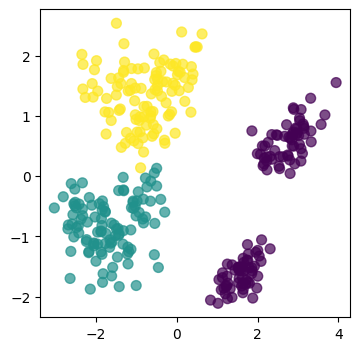

In [139]:
plt.figure(figsize=(4,4))
plt.scatter(x=stats[:,0], y=stats[:, 1], s=50, c=clusters2, alpha=0.7)

Agglomeratív klaszterezés:

In [140]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

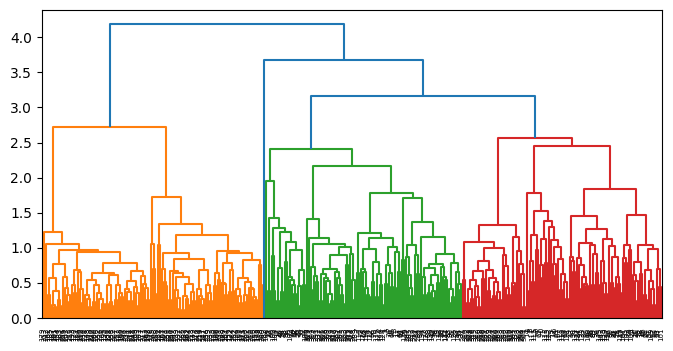

In [141]:
plt.figure(figsize=(8, 4))
linkage_data = linkage(pingvin_sc, method='average', metric='euclidean')
dendrogram(linkage_data)
plt.show()

In [142]:
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='average')
clusters = hc.fit_predict(pingvin_sc)
clusters

array([1, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1,
       3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3,

array([[<Axes: xlabel='island', ylabel='island'>,
        <Axes: xlabel='bill_length_mm', ylabel='island'>,
        <Axes: xlabel='bill_depth_mm', ylabel='island'>,
        <Axes: xlabel='flipper_length_mm', ylabel='island'>,
        <Axes: xlabel='body_mass_g', ylabel='island'>,
        <Axes: xlabel='sex', ylabel='island'>],
       [<Axes: xlabel='island', ylabel='bill_length_mm'>,
        <Axes: xlabel='bill_length_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='bill_length_mm'>,
        <Axes: xlabel='body_mass_g', ylabel='bill_length_mm'>,
        <Axes: xlabel='sex', ylabel='bill_length_mm'>],
       [<Axes: xlabel='island', ylabel='bill_depth_mm'>,
        <Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='bill_depth_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='flipper_length_mm', ylabel='bill_depth_mm'>,
        <Axes: xlabel='body_mass_g', yla

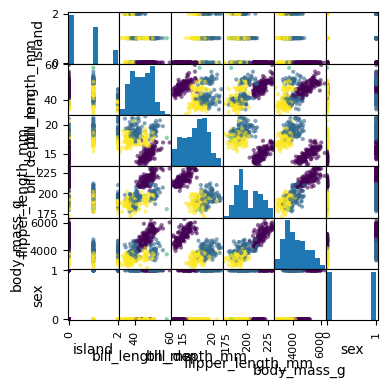

In [143]:
pd.plotting.scatter_matrix(pingvin, alpha=0.6, figsize=(4,4), c=clusters)

In [144]:
pingvin2 = pd.read_csv('https://vargadaniel.web.elte.hu/bigdata24/pingvin_full.csv')
pingvin2.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [145]:
pingvin2.drop(columns=['year'])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [146]:
pingvin2.dropna(inplace=True)

In [147]:
pd.crosstab(clusters, pingvin2['species'])

species,Adelie,Chinstrap,Gentoo
row_0,,,
0,0,0,119
1,73,34,0
2,0,1,0
3,73,33,0
